In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/MyDrive/MVA/compstats/hyperspherical_vae_hm/

/content/gdrive/MyDrive/MVA/compstats/hyperspherical_vae_hm


## Train model with HM sampling

In [ ]:
!python mnist.py

##### Hyper-spherical VAE #####
/usr/local/lib/python3.8/dist-packages/torch/distributions/distribution.py:45: UserWarning: <class 'hyperspherical_vae.distributions.hyperspherical_uniform.HypersphericalUniform'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +
Epoch 0 : loss_recon=157.87554931640625, KL=4.524741172790527, ELBO=-162.40028381347656
Epoch 5 : loss_recon=151.0458221435547, KL=5.920619010925293, ELBO=-156.96644592285156
Epoch 10 : loss_recon=141.1628875732422, KL=6.162405490875244, ELBO=-147.32528686523438
Epoch 15 : loss_recon=132.00289916992188, KL=6.4005656242370605, ELBO=-138.40345764160156
Epoch 20 : loss_recon=146.3728485107422, KL=6.47515344619751, ELBO=-152.84800720214844
Epoch 25 : loss_recon=158.60855102539062, KL=6.654520511627197, ELBO=-165.26307678222656
Epoch 30 : loss_recon=137.11381530

## Training performance

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('./training_perf.csv', index_col=0)
train2 = pd.read_csv("./training_perf_2.csv", index_col=0)
train3 = pd.read_csv("./training_perf_3.csv", index_col=0)
train4 = pd.read_csv("./training_perf_4.csv", index_col=0)
train

,recon loss,KL loss,ELBO
0,157.875549,4.524741,-162.400284
1,149.766296,4.938921,-154.705215
2,150.566086,5.354179,-155.920258
3,139.850555,5.323613,-145.174164
4,129.161621,5.799932,-134.961548
...,...,...,...
95,144.257156,7.025563,-151.282715
96,120.858559,7.329223,-128.187775
97,119.069946,7.090416,-126.160362
98,125.006363,7.254575,-132.260941


In [ ]:
train['run_id'] = 1
train['epoch'] = train.index

train2['run_id'] = 2
train2['epoch'] = train2.index

train3['run_id'] = 3
train3['epoch'] = train3.index

train4['run_id'] = 4
train4['epoch'] = train4.index

train_all = pd.concat([train, train2, train3, train4])
train_all.reset_index(inplace=True)

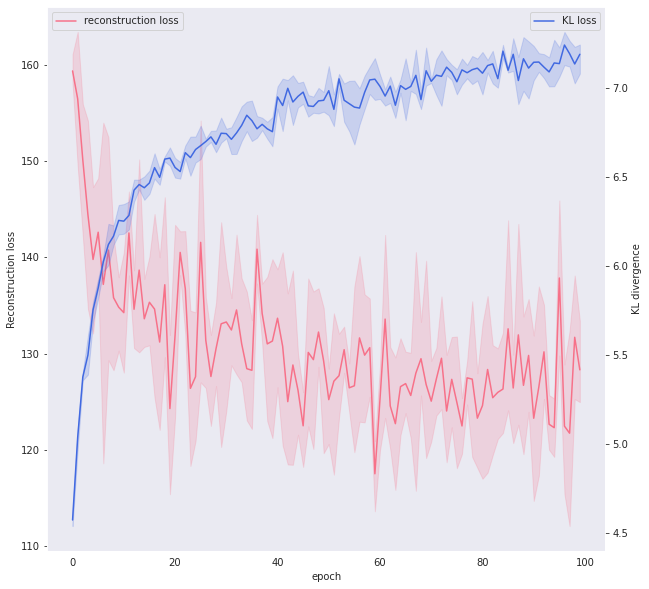

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")
sns.set_palette("husl")
plt.figure(figsize=(10,10))
sns.lineplot(data=train_all, x="epoch", y="recon loss", label="reconstruction loss")
plt.legend(loc="upper left")
plt.ylabel("Reconstruction loss")
ax = plt.gca().twinx()
sns.lineplot(data=train_all, x="epoch", y="KL loss", ax=ax, label="KL loss", color="royalblue")
ax.set_ylabel("KL divergence")
plt.legend(loc="upper right")
plt.xlabel("# Iterations")
plt.savefig("training_performance_all_hm.png", dpi=300)

plt.show()


## Comparison to performances of the original model (which we reran 4 times

In [ ]:
train = pd.read_csv('../svae/training_perf.csv', index_col=0)
train2 = pd.read_csv("../svae/training_perf_2.csv", index_col=0)
train3 = pd.read_csv("../svae/training_perf_3.csv", index_col=0)
train4 = pd.read_csv("../svae/training_perf_4.csv", index_col=0)
train

,recon loss,KL loss,ELBO
0,155.550369,4.525716,-160.076080
1,160.272751,4.935993,-165.208740
2,146.605392,5.193404,-151.798798
3,148.181519,5.387626,-153.569138
4,140.891373,5.653907,-146.545273
...,...,...,...
95,145.510681,7.068420,-152.579102
96,137.118515,7.132162,-144.250671
97,132.876877,7.201322,-140.078201
98,126.470268,7.090856,-133.561127


In [ ]:
train['run_id'] = 1
train['epoch'] = train.index

train2['run_id'] = 2
train2['epoch'] = train2.index

train3['run_id'] = 3
train3['epoch'] = train3.index

train4['run_id'] = 4
train4['epoch'] = train4.index

train_all = pd.concat([train, train2, train3, train4])
train_all.reset_index(inplace=True)

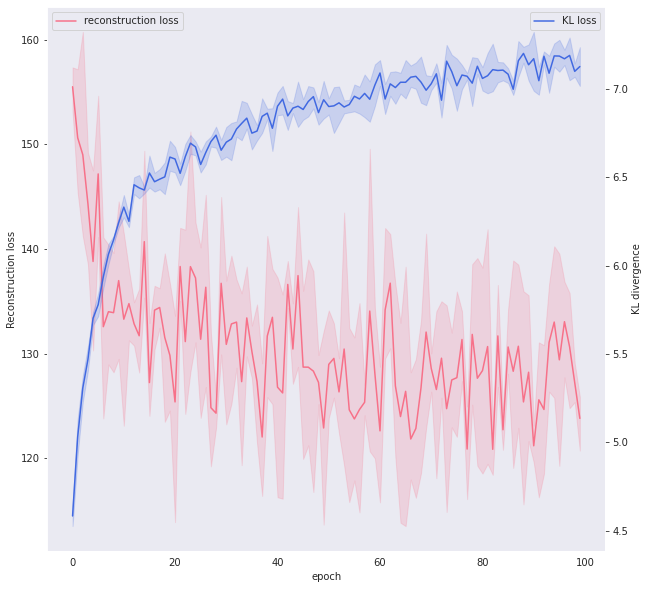

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")
sns.set_palette("husl")
plt.figure(figsize=(10,10))
sns.lineplot(data=train_all, x="epoch", y="recon loss", label="reconstruction loss")
plt.legend(loc="upper left")
plt.ylabel("Reconstruction loss")
ax = plt.gca().twinx()
sns.lineplot(data=train_all, x="epoch", y="KL loss", ax=ax, label="KL loss", color="royalblue")
ax.set_ylabel("KL divergence")
plt.legend(loc="upper right")
plt.xlabel("# Iterations")
plt.savefig("training_performance_all.png", dpi=300)

plt.show()


## Evaluate both methods (HM and original samplings) on the testing set

In [ ]:
import numpy as np
test_perf1 = np.load('../svae/test_perf.npy', allow_pickle=True).item()
test_perf2 = np.load('../svae/test_perf_2.npy', allow_pickle=True).item()
test_perf3 = np.load('../svae/test_perf_3.npy', allow_pickle=True).item()
test_perf4 = np.load('../svae/test_perf_4.npy', allow_pickle=True).item()
test_perfs_all = {}
for k in test_perf1:
  test_perfs_all[k] = [np.mean(test_perf1[k]), np.mean(test_perf2[k]), np.mean(test_perf3[k]), np.mean(test_perf4[k])]
test_perfs_all

{'recon loss': [127.58459462937276,
  127.84366544492686,
  128.63784644254454,
  128.6205357351121],
 'KL': [7.120233575249933,
  7.161884939594633,
  7.142273347089245,
  7.1529720695155445],
 'ELBO': [-134.7048282046227,
  -135.00555038452148,
  -135.78011978963377,
  -135.77350780462763],
 'LL': [-132.97530457320488,
  -133.17076329516757,
  -133.82502945820997,
  -133.81217708709133]}

In [ ]:
test_perf1_hm = np.load('./test_perf.npy', allow_pickle=True).item()
test_perf2_hm = np.load('./test_perf_2.npy', allow_pickle=True).item()
test_perf3_hm = np.load('./test_perf_3.npy', allow_pickle=True).item()
test_perf4_hm = np.load('./test_perf_4.npy', allow_pickle=True).item()
test_perfs_all_hm = {}
for k in test_perf1:
  test_perfs_all_hm[k] = [np.mean(test_perf1_hm[k]), np.mean(test_perf2_hm[k]), np.mean(test_perf3_hm[k]), np.mean(test_perf4_hm[k])]
test_perfs_all_hm

{'recon loss': [129.17994704519867,
  127.60481106703449,
  127.77471884952229,
  128.275853928487],
 'KL': [7.062639442978392,
  7.184074389706751,
  7.155877942492248,
  7.125524508725306],
 'ELBO': [-136.24258648817707,
  -134.78888545674124,
  -134.93059679201454,
  -135.40137843721232],
 'LL': [-134.32567756798616,
  -132.80526709101002,
  -132.93009331575624,
  -133.41249725924936]}

In [ ]:
recap = pd.DataFrame(columns=['HM sampling', 'Original sampling'])
for k in test_perfs_all.keys():
  recap.loc[k, :] = [np.mean(test_perfs_all_hm[k]).round(2), np.mean(test_perfs_all[k]).round(2)]
recap

,HM sampling,Original sampling
recon loss,128.21,128.17
KL,7.13,7.14
ELBO,-135.34,-135.32
LL,-133.37,-133.45


In [ ]:
for k in test_perfs_all:
  print(k)
  print(f"Std HM = {np.std(test_perfs_all_hm[k]).round(3)} ")
  print(f"Std Original = {np.std(test_perfs_all[k]).round(3)}\n")

recon loss
Std HM = 0.613 
Std Original = 0.467

KL
Std HM = 0.045 
Std Original = 0.016

ELBO
Std HM = 0.568 
Std Original = 0.473

LL
Std HM = 0.597 
Std Original = 0.379



Compute a t-test to see if the results are statistically different

In [ ]:
from scipy.stats import ttest_ind
for k in test_perfs_all.keys():
  res, pval = ttest_ind(test_perfs_all[k], test_perfs_all_hm[k])
  print(f"Different results for {k} : {pval < .05} with pval={pval}")

Different results for recon loss : False with pval=0.9360859538023298
Different results for KL : False with pval=0.6705370808394393
Different results for ELBO : False with pval=0.9554272420740835
Different results for LL : False with pval=0.855910130358843
